<a href="https://colab.research.google.com/github/systemsmedicine/Analysis/blob/main/Uniformly_Continuous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Why $f(x) = x^2$ is Not Uniformly Continuous

Even though $f(x) = x^2$ is continuous everywhere, it is **not uniformly continuous**. This becomes evident at large values of \(x\), where a tiny horizontal change (δ) produces a **huge vertical jump**.

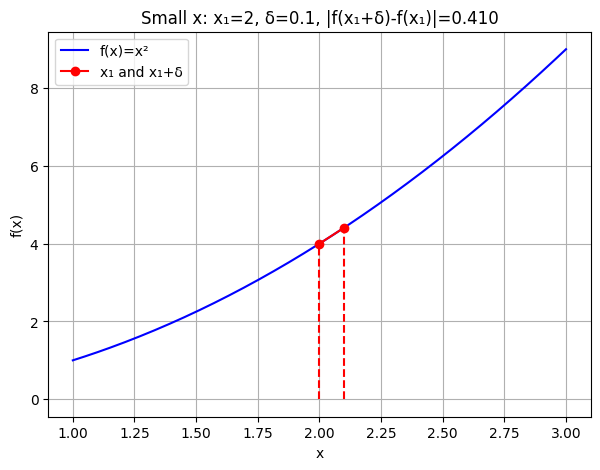

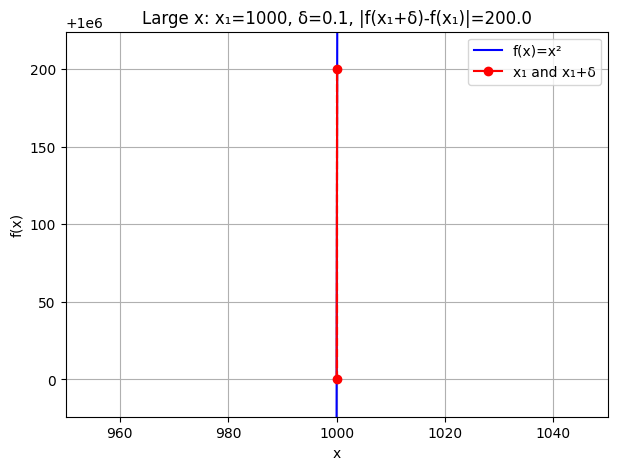

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function
def f(x):
    return x**2

delta = 0.1  # small fixed delta

# --- Small x (for comparison) ---
x1_small = 2
x_small = np.linspace(1, 3, 200)
y_small = f(x_small)

x2_small = x1_small + delta
y1_small, y2_small = f(x1_small), f(x2_small)

plt.figure(figsize=(7,5))
plt.plot(x_small, y_small, label='f(x)=x²', color='blue')
plt.plot([x1_small, x2_small], [y1_small, y2_small],
         'ro-', label='x₁ and x₁+δ')
plt.vlines([x1_small, x2_small], 0, [y1_small, y2_small],
           colors='red', linestyles='dashed')
plt.title(f"Small x: x₁={x1_small}, δ={delta}, |f(x₁+δ)-f(x₁)|={y2_small-y1_small:.3f}")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

# --- Large x (~1000) ---
x1_large = 1000
x2_large = x1_large + delta
y1_large, y2_large = f(x1_large), f(x2_large)

# Zoom window around the points
x_margin = 50      # show a bit before and after the two points
y_margin = (y2_large - y1_large) * 1.2  # enough margin to see vertical jump

x_large = np.linspace(x1_large - x_margin, x2_large + x_margin, 200)
y_large = f(x_large)

plt.figure(figsize=(7,5))
plt.plot(x_large, y_large, label='f(x)=x²', color='blue')
plt.plot([x1_large, x2_large], [y1_large, y2_large],
         'ro-', label='x₁ and x₁+δ')
plt.vlines([x1_large, x2_large], y1_large, y2_large,
           colors='red', linestyles='dashed')

# Zoom axes around the points
plt.xlim(x1_large - x_margin, x2_large + x_margin)
plt.ylim(y1_large - y_margin*0.1, y2_large + y_margin*0.1)

plt.title(f"Large x: x₁={x1_large}, δ={delta}, |f(x₁+δ)-f(x₁)|={y2_large-y1_large:.1f}")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()



### Practical consequences:

A smaller ε means stricter precision: the function must stay within a very small vertical window.
- This corresponds to "zooming in" on the function at x₀: the function behaves predictably and smoothly at every scale.
- For functions like f(x) = x², δ must shrink as x grows to satisfy a tiny ε, which is why x² is continuous but not uniformly continuous.

1. **Numerical Computations**  
   - Small changes in large x can cause huge changes in f(x).  
   - Rounding errors or step sizes in simulations may get amplified, leading to **numerical instability**.

2. **Control Systems**  
   - Precise control relies on predictable changes in the output.  
   - At large x, tiny input errors lead to huge output deviations, making uniform control difficult.

3. **Physical Modeling**  
   - Quantities that grow quadratically (like energy ~ velocity²) can “blow up” at large inputs.  
   - Assuming uniform behavior across all x may be invalid.

4. **Data Analysis / Machine Learning**  
   - Very steep regions of functions can dominate loss functions or gradients.  
   - This can make optimization unstable unless inputs are normalized or the domain is restricted.

### Summary

- At large x, a fixed δ can no longer keep \(|f(x + δ) - f(x)|\) small.  
- This **demonstrates the failure of uniform continuity** and explains why caution is needed in computations and modeling with rapidly growing functions.
